# Simple and Multiple Linear Regression using sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [57]:
data=pd.read_csv('automobileEDA.csv')

In [58]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [59]:
data.shape

(201, 29)

# Simple Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [62]:
X = data[['highway-mpg']]
Y = data['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [63]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [64]:
print(lm.intercept_)
print(lm.coef_)

38423.3058581574
[-821.73337832]


In [66]:
lm1 = LinearRegression()
X = data[['engine-size']]
Y = data['price']
lm1.fit(X,Y)

LinearRegression()

In [67]:
Yhat=lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [69]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281024
[166.86001569]


# Multiple Linear Regression

In [71]:
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
lm.fit(Z, data['price'])

LinearRegression()

In [72]:
print(lm.intercept_)
print(lm.coef_)

-15806.62462632923
[53.49574423  4.70770099 81.53026382 36.05748882]


(0.0, 47539.98826311766)

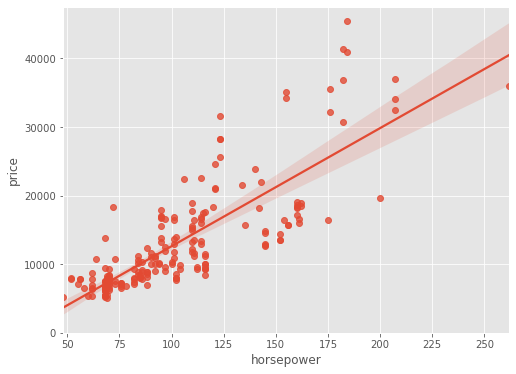

In [77]:
plt.figure(figsize=(8,6))
sns.regplot(x='horsepower',y='price',data=data)
plt.ylim(0,)

(0.0, 47414.1)

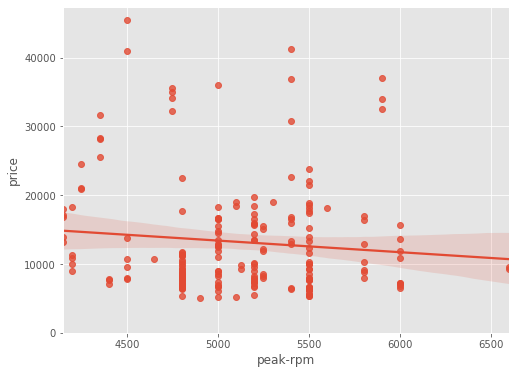

In [79]:
plt.figure(figsize=(8,6))
sns.regplot(x="peak-rpm", y="price", data=data)
plt.ylim(0,)

In [80]:
data[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


(0.0, 33129.93533408738)

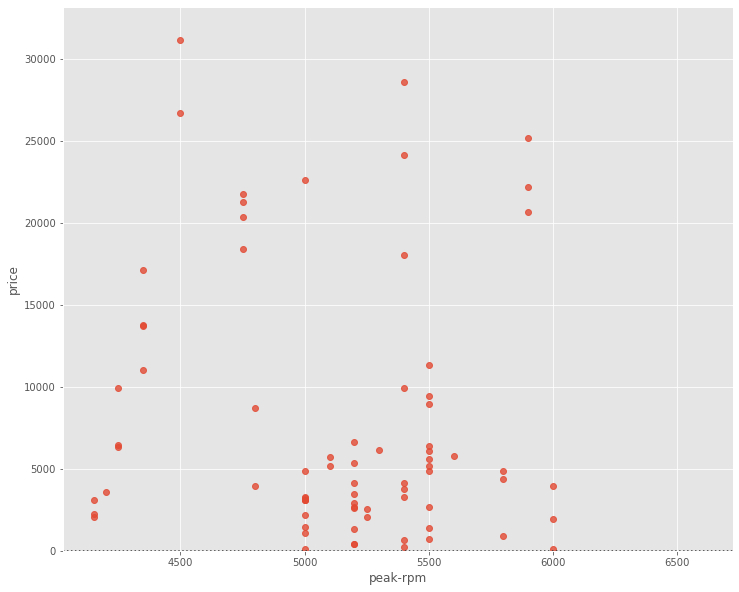

In [81]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="peak-rpm", y="price", data=data)
plt.ylim(0,)

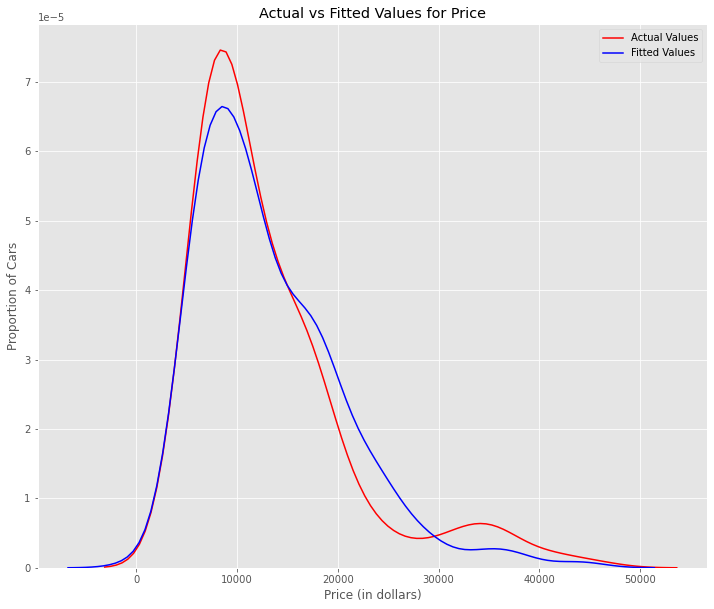

In [82]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(data['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()